In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

In [2]:
email_data = pd.read_csv('hw3Data/emails.csv', header=None)
D2_data = pd.read_csv('hw3Data/D2z.txt', sep=" ", header=None)

/var/folders/yq/3cv6zh6d1bn3rphptqpcqdkm0000gn/T/ipykernel_21695/1056718747.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

In [3]:
email_data.drop(0, axis=0, inplace=True)
email_data.drop(0, axis=1, inplace=True)

In [4]:
email_data

,1,2,3,4,5,6,7,8,9,10,...,2992,2993,2994,2995,2996,2997,2998,2999,3000,3001
1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,20,6,3,1,1,1,34,0,0,15,...,0,0,0,0,0,0,0,1,0,0
4997,0,7,1,0,0,0,20,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4998,6,8,1,3,2,1,64,7,1,16,...,0,0,0,0,0,0,0,0,0,0
4999,8,6,2,5,6,1,51,4,0,4,...,0,0,0,0,0,0,0,0,0,0


In [5]:
email_data = email_data.apply(pd.to_numeric)

In [6]:
normalize_email_data = (email_data - email_data.min())/(email_data.max() - email_data.min())

In [7]:
normalize_email_data

,1,2,3,4,5,6,7,8,9,10,...,2992,2993,2994,2995,2996,2997,2998,2999,3000,3001
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001054,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.038095,0.098485,0.067055,0.067416,0.133333,0.025974,0.053741,0.014286,0.161677,0.080717,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.008772,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004215,0.000000,0.000000,0.017937,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.037879,0.061224,0.000000,0.111111,0.012987,0.026870,0.028571,0.059880,0.004484,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
5,0.033333,0.045455,0.046647,0.011236,0.111111,0.025974,0.030032,0.000000,0.053892,0.013453,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.008772,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.095238,0.045455,0.005831,0.011236,0.022222,0.012987,0.017914,0.000000,0.000000,0.067265,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.008772,0.0,0.0
4997,0.000000,0.053030,0.000000,0.000000,0.000000,0.000000,0.010537,0.014286,0.005988,0.000000,...,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.000000,0.0,0.0
4998,0.028571,0.060606,0.000000,0.033708,0.044444,0.012987,0.033720,0.100000,0.005988,0.071749,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4999,0.038095,0.045455,0.002915,0.056180,0.133333,0.012987,0.026870,0.057143,0.000000,0.017937,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [8]:
D2_data

,0,1,2
0,-0.333338,-0.087171,0
1,-1.531730,0.358194,1
2,1.549590,-0.364050,0
3,-1.349910,0.252063,1
4,1.283850,-0.531146,0
...,...,...,...
195,-0.697750,1.098280,1
196,1.161160,-0.733751,0
197,-1.288480,0.443773,1
198,-1.384200,0.526523,1


In [9]:
class KNN():
    def __init__(self, k, normalize=False, delta=0, checkROC=False) -> None:
        self.check_k = k
        self.data = None
        self.delta = delta
        self.labels = None
        self.min_ = None
        self.distance_from_origin = None
        self.normalize = normalize
        self.checkROC = checkROC
    
    ## Implementing euclidean distance
    def distance(self, x, y):
        diff = np.array(np.array(x)-np.array(y))
        dist = np.sum(diff**2)
        return dist
    
    def train(self, data):
        self.data = np.array(data)[:,:-1]
        self.labels = np.array(data)[:,-1]
        if self.normalize:
            # self.mean = np.mean(self.data, axis=0)
            # self.diff = np.std(self.data, axis=0)
            self.min_ = np.min(self.data, axis=0)
            max_ = np.max(self.data, axis=0)
            self.diff = (max_ - self.min_) + self.delta
            self.data = (self.data - self.min_)/(self.diff+self.delta)
        # self.distance_from_origin = self.distance(self.data, np.zeros(self.data.shape))
    
    def predict(self, data_point, thres=0.5):
        distances = defaultdict()
        if self.normalize:
            data_point = (data_point - self.min_)/(self.diff+self.delta)
        for d in range(len(self.data)):
            distances[d] = self.distance(data_point, self.data[d])
        values = sorted(distances.items(), key=lambda x: x[1])
        values = values[:self.check_k]
        labels = []
        for value in values:
            labels.append(self.labels[value[0]])
        
        
        predict_label = sum(labels)/len(labels)
        if self.checkROC:
            # print(predict_label)
            return predict_label
        else:
            counter = Counter(labels)
            # print(counter)
            return sorted(counter.items(), key=lambda x: x[1], reverse=True)[0][0]

        

In [10]:
knn_clf = KNN(1, normalize=False)

In [11]:
knn_clf.train(D2_data)

In [14]:
res = defaultdict(list)
for x in np.linspace(-2,2,21):
    for y in np.linspace(-2,2,21):
        data_point = (np.round(x,2), np.round(y,2))
        res[knn_clf.predict(np.array(data_point))>0.5].append(list(data_point))

In [15]:
zero_labels = D2_data[D2_data[2]==0]
one_labels = D2_data[D2_data[2]==1]

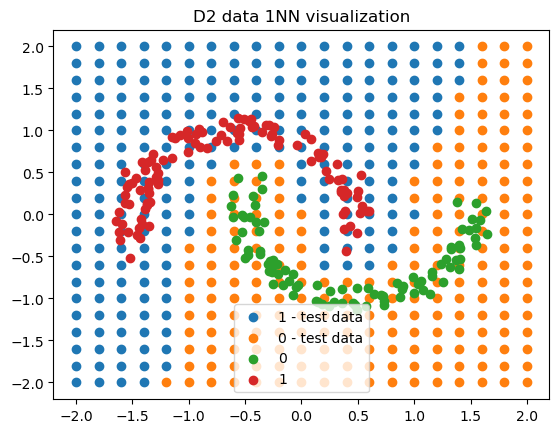

In [16]:
for k,v in res.items():
    plot_data = np.array(v)
    # print(plot_data[:,0])
    plt.scatter(plot_data[:, 0], plot_data[:,1], label=f'{int(k)} - test data')
plt.scatter(zero_labels[0], zero_labels[1], label='0')
plt.scatter(one_labels[0], one_labels[1], label='1')
plt.legend()
# plt.tight_layout()
plt.title("D2 data 1NN visualization")
plt.savefig("D2 data 1NN visualization.pdf")

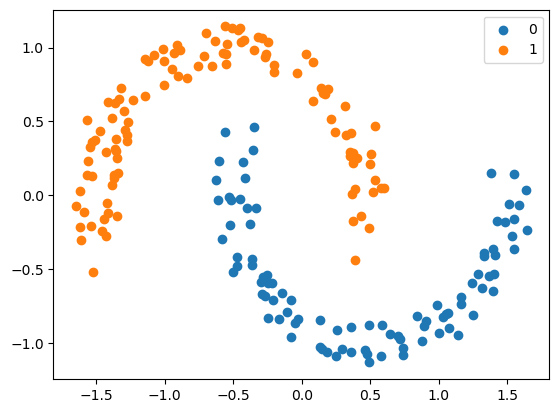

In [17]:
plt.scatter(zero_labels[0], zero_labels[1], label='0')
plt.scatter(one_labels[0], one_labels[1], label='1')
plt.legend()

In [18]:
def calculate_acc_prec_recall(res_check, thres=0.5):
    r = {}
    r[1] = [1 if val>=thres else 0 for val in res_check[1]]
    r[0] = [1 if val>=thres else 0 for val in res_check[0]]
    TP = np.sum(r[1])
    FP = np.sum(r[0])
    TN = len(r[0]) - np.sum(r[0])
    FN = len(r[1]) - np.sum(r[1])
    
    accuracy = (TP + TN)/(TP + TN + FP + FN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    FPR = (FP)/(FP+TN)
    return accuracy, precision, recall, FPR

In [68]:
from sklearn.metrics import auc

def plot_ROC(res, num_points=10, thres_range=[], title="ROC curve"):
    roc_data = []
    if len(thres_range) == 0:
        for thres in np.linspace(0.01, 1.01, num_points):
            _, _, TPR, FPR = calculate_acc_prec_recall(res, thres)
            roc_data.append((FPR, TPR))
            dist = np.sum(np.array(np.array([FPR, TPR]) - np.array([0,1]))**2)
            # print(thres, TPR, FPR, dist)
    else:
        for thres in thres_range:
            
            _, _, TPR, FPR = calculate_acc_prec_recall(res, thres)
            roc_data.append((FPR, TPR))
            dist = np.sum(np.array(np.array([FPR, TPR]) - np.array([0,1]))**2)
            # print(thres, TPR, FPR, dist)
    plt_roc_data = np.array(roc_data)
    
    plt.plot(plt_roc_data[:,0], plt_roc_data[:,1], marker='.', 
             label=f'AUC {auc(plt_roc_data[:,0], plt_roc_data[:,1])}')
    plt.xlabel("False positive rate (positive label: 1)")
    plt.ylabel("True positive rate (positive label: 1)")
    plt.grid()
    plt.legend()
    plt.title(title)
    plt.savefig(title+'.pdf')
    plt.show()
    plt.close()    
        
            

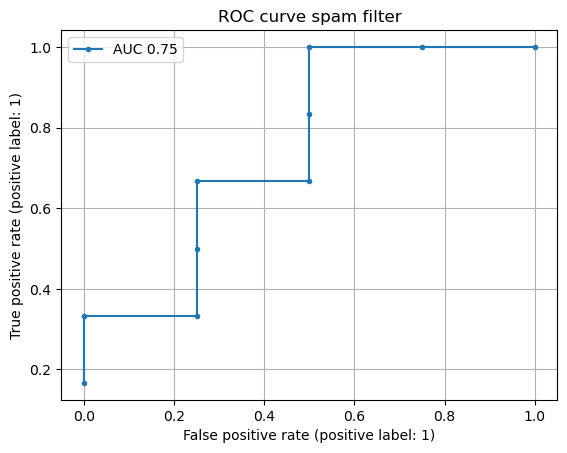

In [69]:
res = {}
res[0] = [0.8,0.45,0.2,0.1]
res[1] = [0.95, 0.85, 0.7, 0.55, 0.4, 0.3]
plot_ROC(res, thres_range=sorted(res[0]+res[1]), title="ROC curve spam filter")

In [21]:
def run_kfold_KNN(kN, data, kfolds=5, normalize=False, ROC_fig=False, thres_range=[]):
    results = []
    accuracy_kf = []
    chunk_size = len(data)//kfolds
    for fold_num in range(kfolds):
        test_data = data[data.index.isin(list(range(fold_num*chunk_size,
                                                    (fold_num+1)*chunk_size)))]
        train_data = data[~data.index.isin(list(range(fold_num*chunk_size,
                                                    (fold_num+1)*chunk_size)))]
        train_data = train_data.to_numpy(dtype=np.float64)
        test_data = test_data.to_numpy(dtype=np.float64)

        knn_clf = KNN(kN, normalize=normalize, checkROC=ROC_fig)
        knn_clf.train(train_data)
        
        res = defaultdict(list)
        for dp in test_data:
            res[dp[-1]].append(knn_clf.predict(np.array(dp[:-1])))
        accuracy, precision, recall, FPR = calculate_acc_prec_recall(res)
        results.append(res)
        if ROC_fig:
            plot_ROC(res, thres_range=thres_range)
        print(f' Fold {fold_num+1}, accuracy: {accuracy} precision: {precision} recall: {recall}')
        accuracy_kf.append(accuracy)
    return results, accuracy_kf

In [92]:
_, accu_rf = run_kfold_KNN(1, email_data)

 Fold 1, accuracy: 0.8258258258258259 precision: 0.6563380281690141 recall: 0.8175438596491228
 Fold 2, accuracy: 0.853 precision: 0.6837606837606838 recall: 0.8695652173913043
 Fold 3, accuracy: 0.861 precision: 0.7212121212121212 recall: 0.8350877192982457
 Fold 4, accuracy: 0.852 precision: 0.718562874251497 recall: 0.8163265306122449
 Fold 5, accuracy: 0.776 precision: 0.6073298429319371 recall: 0.7581699346405228


In [29]:
avg_accuracy = defaultdict()
for kN in [10, 7, 5, 3, 1][::-1]:
    print(kN)
    accuracy_kf = run_kfold_KNN(kN, email_data)
    avg_accuracy[kN] = np.average(accuracy_kf)
    print(f'average accuracy for {kN}-NN is {avg_accuracy[kN]}')   

1
 Fold 1, accuracy: 0.826 precision: 0.6563380281690141 recall: 0.8175438596491228
 Fold 2, accuracy: 0.854 precision: 0.6866096866096866 recall: 0.8700361010830325
 Fold 3, accuracy: 0.862 precision: 0.7212121212121212 recall: 0.8380281690140845
 Fold 4, accuracy: 0.852 precision: 0.718562874251497 recall: 0.8163265306122449
 Fold 5, accuracy: 0.776 precision: 0.6073298429319371 recall: 0.7581699346405228
average accuracy for 1-NN is 0.834
3
 Fold 1, accuracy: 0.847 precision: 0.680327868852459 recall: 0.8736842105263158
 Fold 2, accuracy: 0.851 precision: 0.6975308641975309 recall: 0.8158844765342961
 Fold 3, accuracy: 0.859 precision: 0.7241379310344828 recall: 0.8133802816901409
 Fold 4, accuracy: 0.88 precision: 0.7788461538461539 recall: 0.826530612244898
 Fold 5, accuracy: 0.774 precision: 0.6086956521739131 recall: 0.7320261437908496
average accuracy for 3-NN is 0.8422000000000001
5
 Fold 1, accuracy: 0.838 precision: 0.6694214876033058 recall: 0.8526315789473684
 Fold 2, accu

In [87]:
avg_accuracy

defaultdict(None,
            {1: 0.834, 3: 0.8422000000000001, 5: 0.8416, 7: 0.8454, 10: 0.849})

In [88]:
x = list(avg_accuracy.keys())
y = list(avg_accuracy.values())

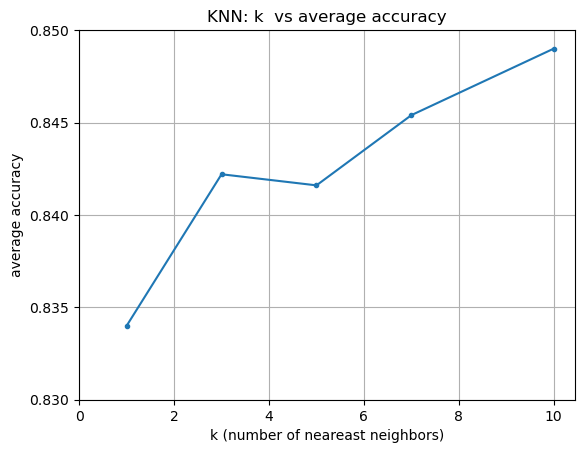

In [89]:
plt.plot(x,y, marker=".")
plt.grid()
plt.xlabel('k (number of neareast neighbors)')
plt.ylabel('average accuracy')
plt.xticks([0,2,4,6,8,10])
plt.yticks(np.linspace(0.83, 0.85, 5))
plt.title("KNN: k  vs average accuracy")
plt.savefig("KNN_avg_acc.pdf")

In [22]:
def sigmoid(x, b):
    return (1/(1+ np.exp(-x-b)))

In [42]:
class logistic_regression():
    def __init__(self, learning_rate=0.01) -> None:
        self.data = None
        self.learning_rate = learning_rate
        self.labels = None
        self.theta = None
        self.epsilon = 1e-6
        self.b = 0
        
    def train(self, data, learning_rate=1e-2):
        self.data = data[:,:-1]
        self.labels = data[:,-1]
        self.learning_rate = learning_rate
        self.theta = np.zeros(self.data[0].shape)
        for _ in range(1000):
            losses = []
            for x,y in zip(self.data, self.labels):
                y_p, loss = self.theta_update(x, y)
                losses.append(loss)
            # print(f'average training loss: {np.average(losses)}')

    def theta_update(self, x, y):
        y_p = sigmoid(np.transpose(self.theta)@x, self.b)
        loss = -y*np.log(y_p+self.epsilon)-(1-y)*np.log(1-y_p+self.epsilon)
        grad = x*(y_p-y)
        self.theta -= self.learning_rate*grad
        self.b -= self.learning_rate*(y_p-y)
        return y_p, loss

    def predict(self, x):
        y_p = sigmoid(np.transpose(self.theta)@x , self.b)
        return y_p
     

In [43]:
def run_kfold_logistic(data, kfolds=5, normalize=False, thres = 0.5, lr=1e-4, thres_range=[]):
    accuracy_kf = []
    results = []
    chunk_size = len(data)//kfolds
    for fold_num in range(kfolds):
        test_data = data.iloc[fold_num*chunk_size: 
                                    (fold_num+1)*chunk_size]
        train_data = data[~data.index.isin(list(range(fold_num*chunk_size,
                                                    (fold_num+1)*chunk_size)))]
        train_data = train_data.to_numpy(dtype=np.float64)
        test_data = test_data.to_numpy(dtype=np.float64)
        lr_clf = logistic_regression()
        lr_clf.train(train_data, learning_rate=lr)
        res = defaultdict(list)
        for dp in test_data:
            res[dp[-1]].append(lr_clf.predict(np.array(dp[:-1])))
        results.append(res)
        accuracy, precision, recall, FPR = calculate_acc_prec_recall(res, thres=thres)
        
        print(f' Fold {fold_num+1}, accuracy: {accuracy} precision: {precision} recall: {recall}')
        accuracy_kf.append(accuracy)
    return results, accuracy_kf

In [95]:
data = email_data
results_knn, results_lr = [], []
kfolds=5
chunk_size = len(data)//kfolds
kN = 5
for fold_num in [4]:
    test_data = data[data.index.isin(list(range(fold_num*chunk_size,
                                                (fold_num+1)*chunk_size)))]
    train_data = data[~data.index.isin(list(range(fold_num*chunk_size,
                                                (fold_num+1)*chunk_size)))]
    train_data = train_data.to_numpy(dtype=np.float64)
    test_data = test_data.to_numpy(dtype=np.float64)
    
    knn_clf = KNN(kN, checkROC=True)
    knn_clf.train(train_data)
    
    lr_clf = logistic_regression()
    lr_clf.train(train_data, learning_rate=1e-4)
    
    res = defaultdict(list)
    for dp in test_data:
        res[dp[-1]].append(knn_clf.predict(np.array(dp[:-1])))
    results_knn.append(res)
    
    res = defaultdict(list)
    for dp in test_data:
        res[dp[-1]].append(lr_clf.predict(np.array(dp[:-1])))
    results_lr.append(res)

/var/folders/yq/3cv6zh6d1bn3rphptqpcqdkm0000gn/T/ipykernel_21695/2000738903.py:11: RuntimeWarning: invalid value encountered in long_scalars
  precision = (TP)/(TP+FP)
/var/folders/yq/3cv6zh6d1bn3rphptqpcqdkm0000gn/T/ipykernel_21695/2000738903.py:11: RuntimeWarning: invalid value encountered in long_scalars
  precision = (TP)/(TP+FP)


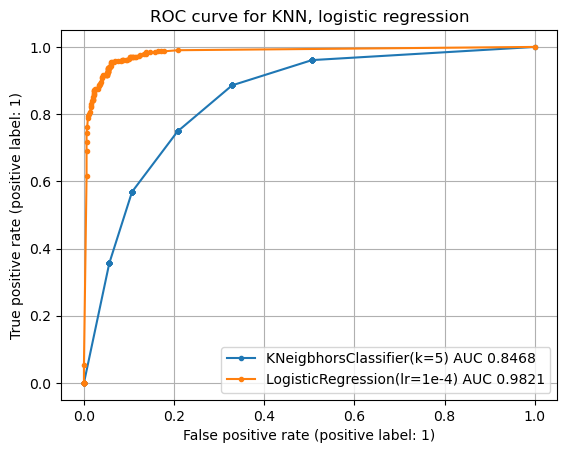

In [96]:
thres_range = np.linspace(0, 1.1, 100)
title = "ROC curve for KNN, logistic regression"
roc_data = []
res = results_knn[0]
for thres in thres_range:
    _, _, TPR, FPR = calculate_acc_prec_recall(res, thres)
    roc_data.append((FPR, TPR))
plt_roc_data = np.array(roc_data)

plt.plot(plt_roc_data[:,0], plt_roc_data[:,1], marker='.', 
            label=f'KNeigbhorsClassifier(k=5) AUC {np.round(auc(plt_roc_data[:,0], plt_roc_data[:,1]),4)}')

roc_data = []
res = results_lr[0]
for thres in thres_range:
    _, _, TPR, FPR = calculate_acc_prec_recall(res, thres)
    roc_data.append((FPR, TPR))
plt_roc_data = np.array(roc_data)

plt_roc_data_auc = np.array(sorted(plt_roc_data, key=lambda x: x[0]))
plt.plot(plt_roc_data[:,0], plt_roc_data[:,1], marker='.', 
            label=f'LogisticRegression(lr=1e-4) AUC {np.round(auc(plt_roc_data_auc[:,0], plt_roc_data_auc[:,1]),4)}'
            )
plt.xlabel("False positive rate (positive label: 1)")
plt.ylabel("True positive rate (positive label: 1)")
plt.grid()
plt.legend()
plt.title(title)
plt.savefig(title+'.pdf')
plt.show()
plt.close()   